# kSVD algorithm

In this notebook, we aim to display some examples of the output of the kSVD algorithm on two datasets, BME and DIGITS.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from source_code import utils
from source_code.models_ksvd import kSVD, kSVD_2D

sparsity_levels = [1, 2, 3, 4, 5, 7, 10]

### Utils

In [2]:
def save_model(model, model_name):
    if 'kSVD' in model_name:
        D_list = model.D_list.copy()
        np.savez_compressed(f'models/{model_name}.npz', D_list=D_list)
    else:
        raise NotImplementedError

def save_2d_model(model, model_name):
    if 'kSVD' in model_name:
        D_list_X = model.D_list_X.copy()
        D_list_Y = model.D_list_Y.copy()
        np.savez_compressed(f'models/{model_name}.npz', D_list_X=D_list_X, D_list_Y=D_list_Y)

def load_model(model_name):
    D_list = list(np.load(f'models/{model_name}.npz')['D_list'])
    if 'kSVD' in model_name:
        new_model = kSVD(n_classes=3, init_dict=D_list)
    else:
        raise NotImplementedError
    return new_model

def load_2d_model(model_name):
    D_list_X = list(np.load(f'models/{model_name}.npz')['D_list_X'])
    D_list_Y = list(np.load(f'models/{model_name}.npz')['D_list_Y'])
    D_list = [D_list_X, D_list_Y]
    if 'kSVD' in model_name:
        new_model = kSVD_2D(n_classes=10, init_dicts=D_list)
    else:
        raise NotImplementedError
    return new_model

def plot_example_1d(x, reconstructed_x, true_label, pred_label, err):
    plt.figure(figsize=(10, 5))
    plt.plot(x, label=f'Original (label={true_label}) ')
    plt.plot(reconstructed_x, label=f'Reconstructed (label={pred_label})')
    plt.legend()
    plt.title(f'Original vs reconstructed signal (error={err:.2f})')
    plt.show() 

def plot_example_2d(x, y, reconstructed_x, reconstructed_y, true_label, pred_label, err):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, label=f'Original (label={true_label}) ')
    plt.plot(reconstructed_x, reconstructed_y, label=f'Reconstructed (label={pred_label})')
    plt.legend()
    plt.title(f'Original vs reconstructed signal (error={err:.2f})')
    plt.show()

## BME dataset

Testing kSVD model on BME dataset with sparsity=1...


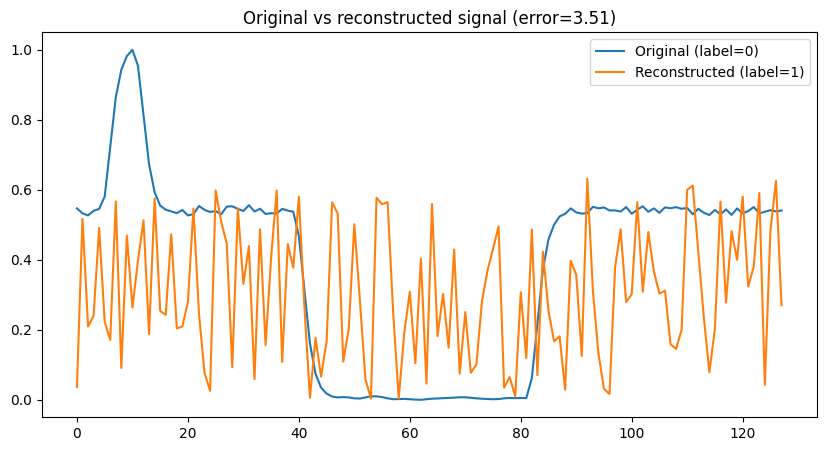

Testing kSVD model on BME dataset with sparsity=2...


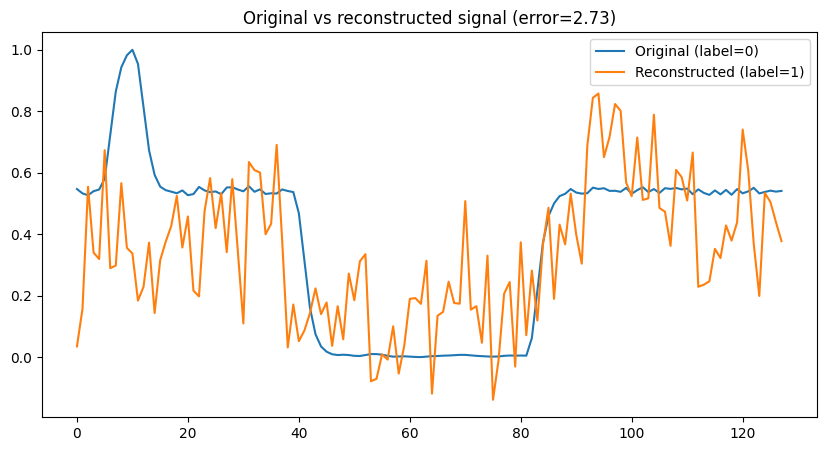

Testing kSVD model on BME dataset with sparsity=3...


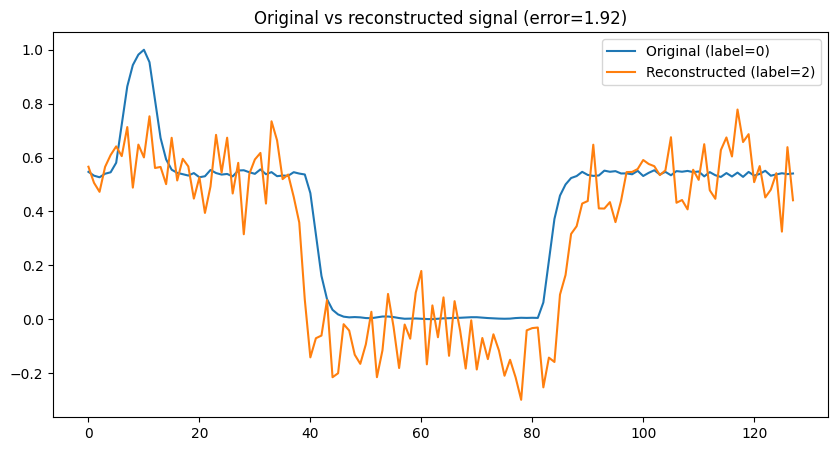

Testing kSVD model on BME dataset with sparsity=4...


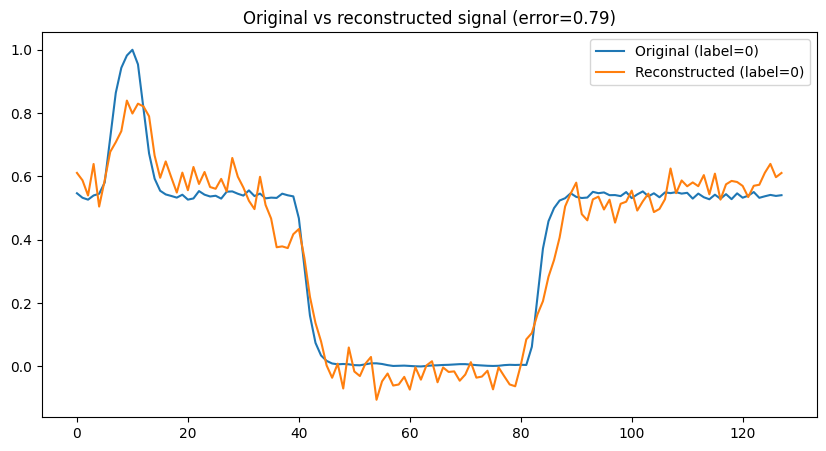

Testing kSVD model on BME dataset with sparsity=5...


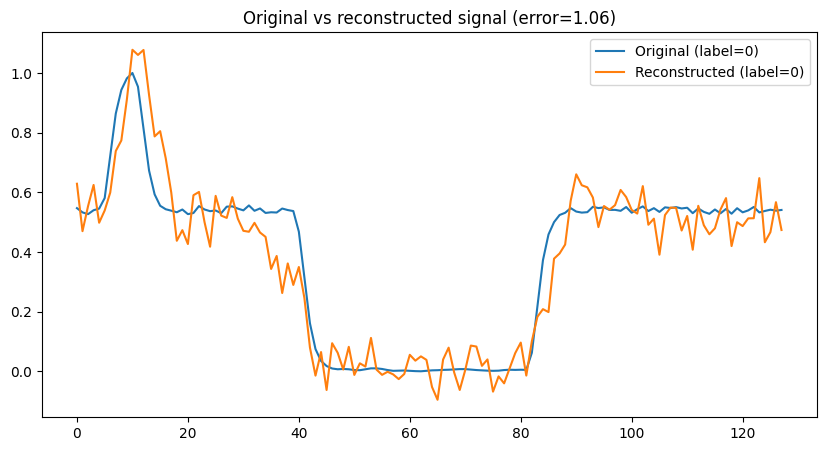

Testing kSVD model on BME dataset with sparsity=7...


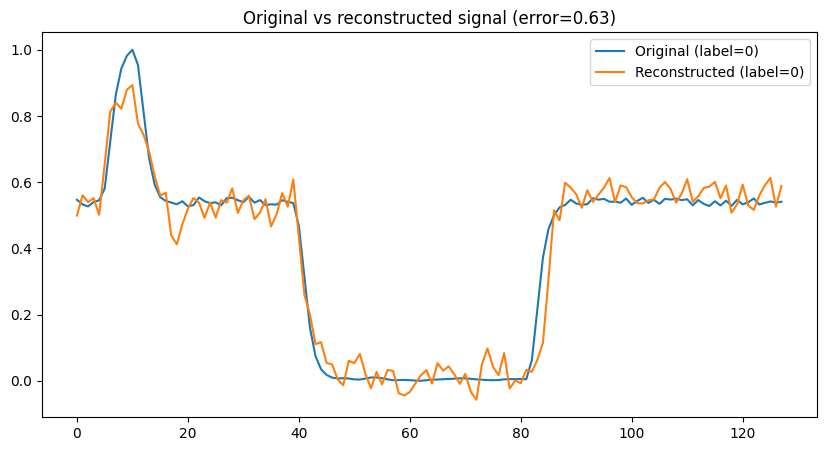

Testing kSVD model on BME dataset with sparsity=10...


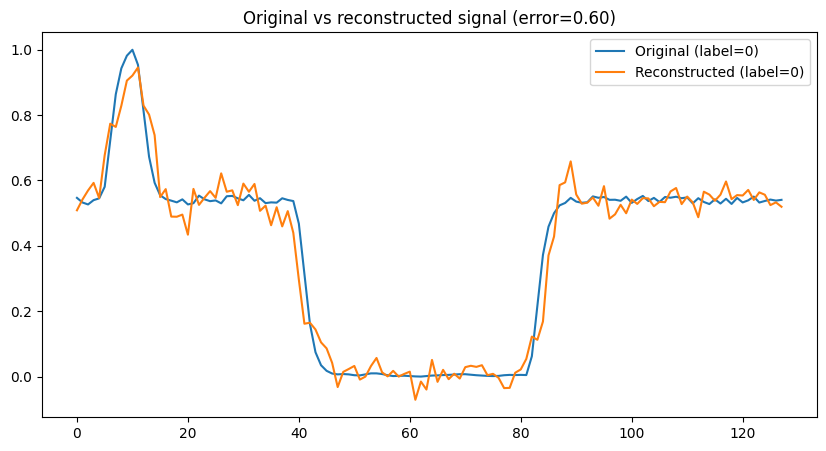

In [3]:
dataset_name = 'BME'

test_matrix, test_labels = utils.get_dataset('BME', 'test')
i = np.random.randint(0, test_matrix.shape[1])
x = test_matrix[:, i]
true_label = test_labels[i]

for sparsity in sparsity_levels:
    print(f'Testing kSVD model on {dataset_name} dataset with sparsity={sparsity}...')
    model_name = f'kSVD_{dataset_name}_sparsity_{sparsity}'
    model = load_model(model_name)

    reconstructed_x, pred_label = model.reconstruct(x, sparsity)
    err = np.linalg.norm(x - reconstructed_x)

    plot_example_1d(x, reconstructed_x, true_label, pred_label, err)   

## DIGITS dataset

Testing kSVD model on DIGITS dataset with sparsity=1...


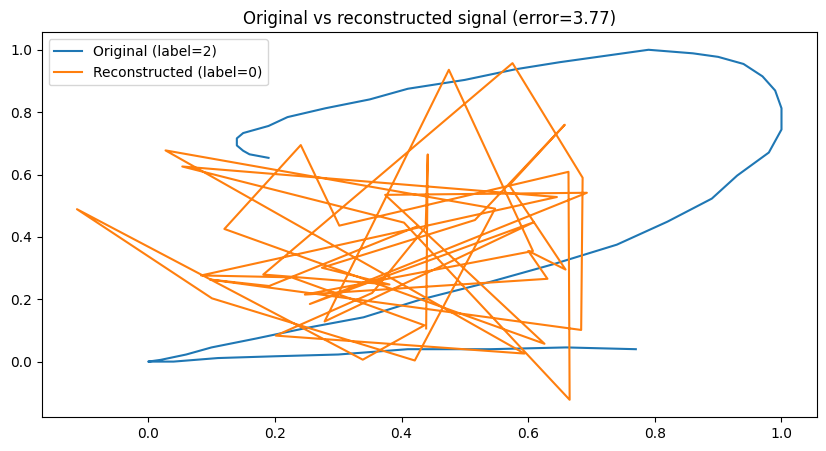

Testing kSVD model on DIGITS dataset with sparsity=2...


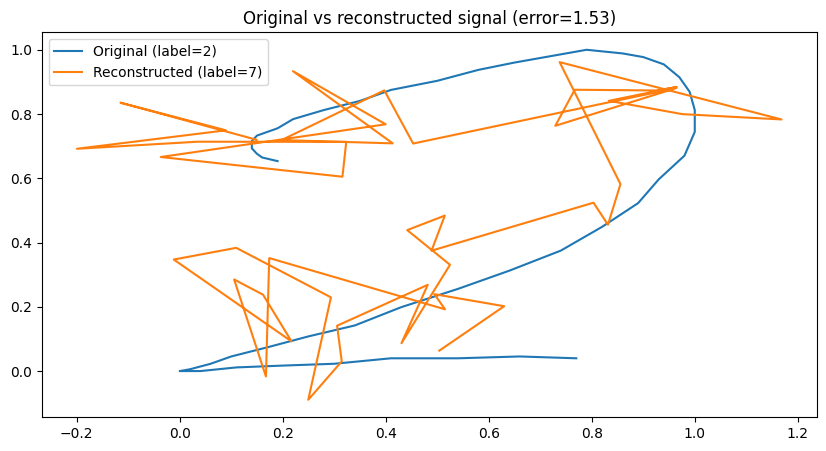

Testing kSVD model on DIGITS dataset with sparsity=3...


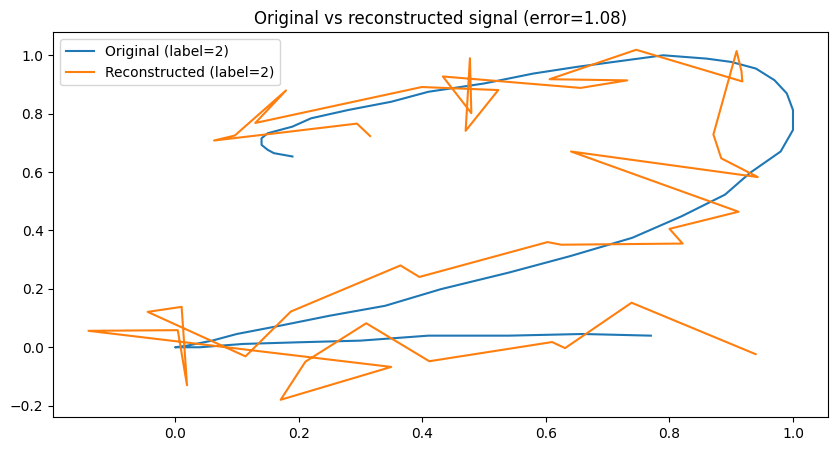

Testing kSVD model on DIGITS dataset with sparsity=4...


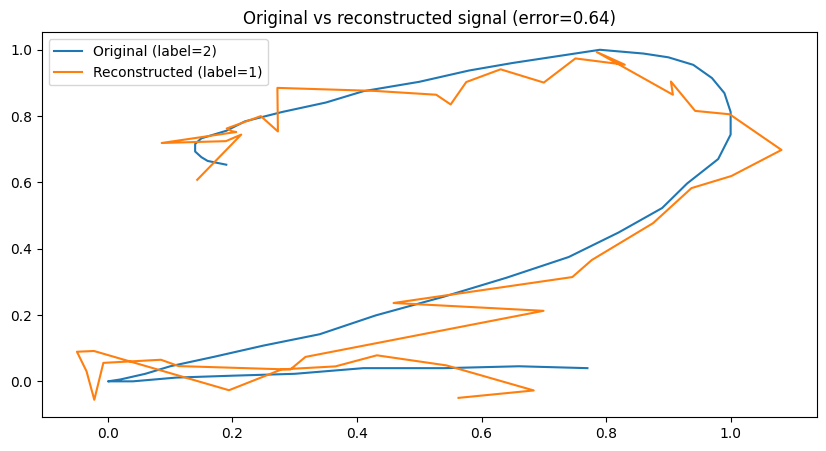

Testing kSVD model on DIGITS dataset with sparsity=5...


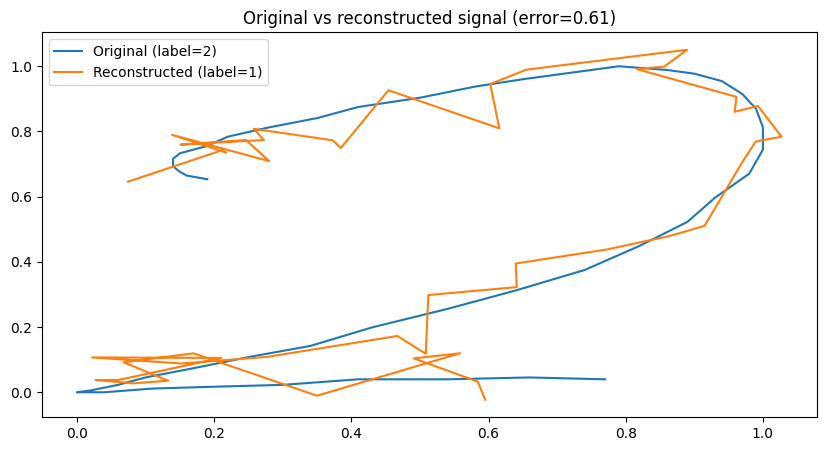

Testing kSVD model on DIGITS dataset with sparsity=7...


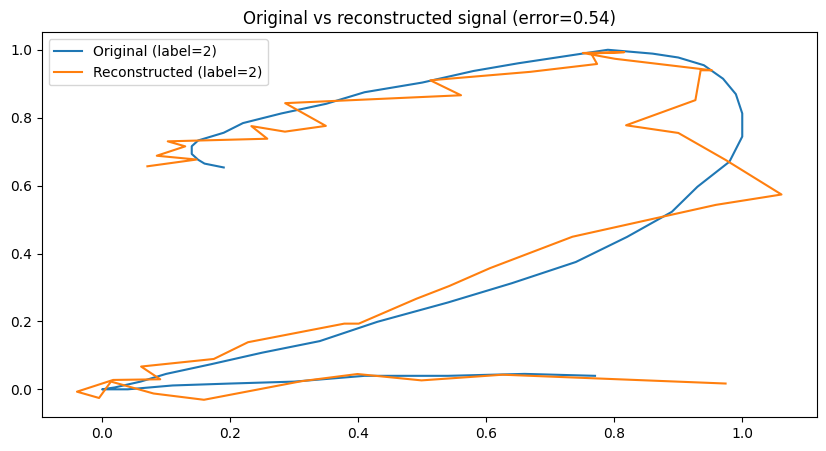

Testing kSVD model on DIGITS dataset with sparsity=10...


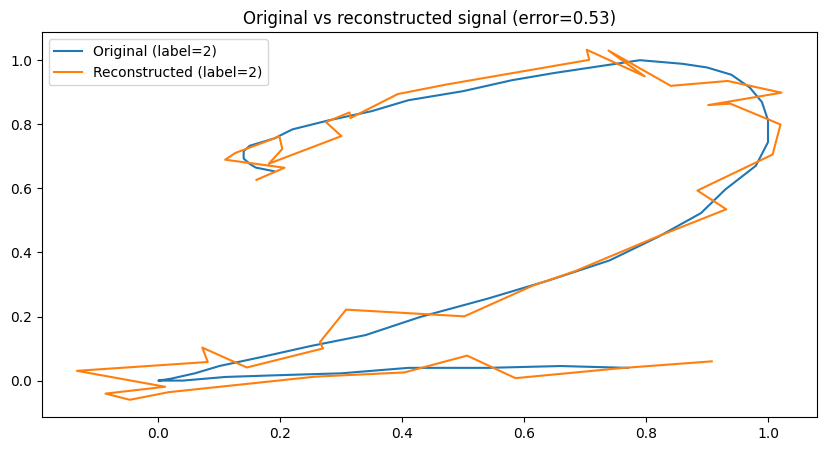

In [4]:
dataset_name = 'DIGITS'

X_test, Y_test, X_test_matrix, Y_test_matrix, test_labels = utils.get_dataset('DIGITS', 'test')
i = np.random.randint(0, X_test_matrix.shape[1])
x = X_test[i]
y = Y_test[i]
true_len = len(x)
true_signal = np.array([x, y]).T
true_label = test_labels[i]

x_array = X_test_matrix[:, i]
y_array = Y_test_matrix[:, i]

for sparsity in sparsity_levels:
    print(f'Testing kSVD model on {dataset_name} dataset with sparsity={sparsity}...')
    model_name = f'kSVD_{dataset_name}_sparsity_{sparsity}'
    model_2d = load_2d_model(model_name)

    reconstructed_x, reconstructed_y, pred_label = model_2d.reconstruct(x_array, y_array, sparsity)
    reconstructed_x = reconstructed_x[:true_len]
    reconstructed_y = reconstructed_y[:true_len]
    reconstructed_signal = np.array([reconstructed_x, reconstructed_y]).T
    err = np.linalg.norm(true_signal - reconstructed_signal)

    plot_example_2d(x, y, reconstructed_x, reconstructed_y, true_label, pred_label, err)